In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed

seed(1)
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor 

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
df=pd.read_excel('Pre-Processed-Data.xlsx')
df.head()

,Wind Speed,Pressure,Pressure Grad,Wind Gradient
0,2.47,1029.0,-8,3
1,7.42,1021.4,0,8
2,6.81,1021.8,11,7
3,3.94,1033.7,-1,2
4,3.33,1033.4,-11,5


In [3]:
df.isnull().sum()

Wind Speed       0
Pressure         0
Pressure Grad    0
Wind Gradient    0
dtype: int64

In [4]:
X = df.drop(['Wind Speed'], axis=1)
#Assign the Target column as the output 
Y= df['Wind Speed']

In [5]:
X_norm=(X-X.min())/(X.max()-X.min())
X_norm

,Pressure,Pressure Grad,Wind Gradient
0,0.752055,0.449275,0.200000
1,0.647945,0.565217,0.533333
2,0.653425,0.724638,0.466667
3,0.816438,0.550725,0.133333
4,0.812329,0.405797,0.333333
...,...,...,...
1091,0.706849,0.623188,0.066667
1092,0.767123,0.594203,0.200000
1093,0.795890,0.594203,0.266667
1094,0.831507,0.565217,0.200000


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=0)

In [7]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2)) #dropping a few neurons for generalizing the model
model.add(Dense(16, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(32, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(32, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(45, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2))
model.add(Dense(64, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2))     
model.add(Dense(1, activation="linear", kernel_initializer='normal'))
adam = Adam(learning_rate=1e-3, decay=1e-3)

# Compile model
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mse','mae'])

In [8]:
print('Fit model...')
filepath="/home/m-marouni/Documents/CE-901/Heathrow/best_weights"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_mae', patience=100, verbose=1, mode='min')
callbacks_list = [checkpoint, early_stopping]

log = model.fit(x_train, y_train,
          validation_split=0.40, batch_size=30, epochs=1000, shuffle=True, callbacks=callbacks_list)

Fit model...
Epoch 1/1000
16/16 [==============================] - 10s 44ms/step - loss: 44.2436 - mse: 44.2436 - mae: 6.1132 - val_loss: 33.3010 - val_mse: 33.3010 - val_mae: 5.2356

Epoch 00001: val_mae improved from inf to 5.23564, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 36.3305 - mse: 36.3305 - mae: 5.4594 - val_loss: 25.2152 - val_mse: 25.2152 - val_mae: 4.3971

Epoch 00002: val_mae improved from 5.23564 to 4.39708, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 27.6686 - mse: 27.6686 - mae: 4.6087 - val_loss: 17.9424 - val_mse: 17.9424 - val_mae: 3.4853

Epoch 00003: val_mae improved from 4

In [9]:
def show_info(model, X, y, log, weights = None):
    '''
    Show metrics about the evaluation model and plots about loss, rmse and rmspe
    '''
    if (log != None):
        # summarize history for loss
        plt.figure(figsize=(14,10))
        plt.plot(log.history['loss'])
        plt.plot(log.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

        # summarize history for MAE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mae'])
        plt.plot(log.history['val_mae'])
        plt.title('Model MAE')
        plt.ylabel('MAE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

        # summarize history for MSE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mse'])
        plt.plot(log.history['val_mse'])
        plt.title('Model MSE')
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')
    if (weights != None):
        model.load_weights(weights)

    predictions = model.predict(X, verbose=1)

    mse = mean_squared_error(y, predictions)
    mae= mean_absolute_error(y, predictions)

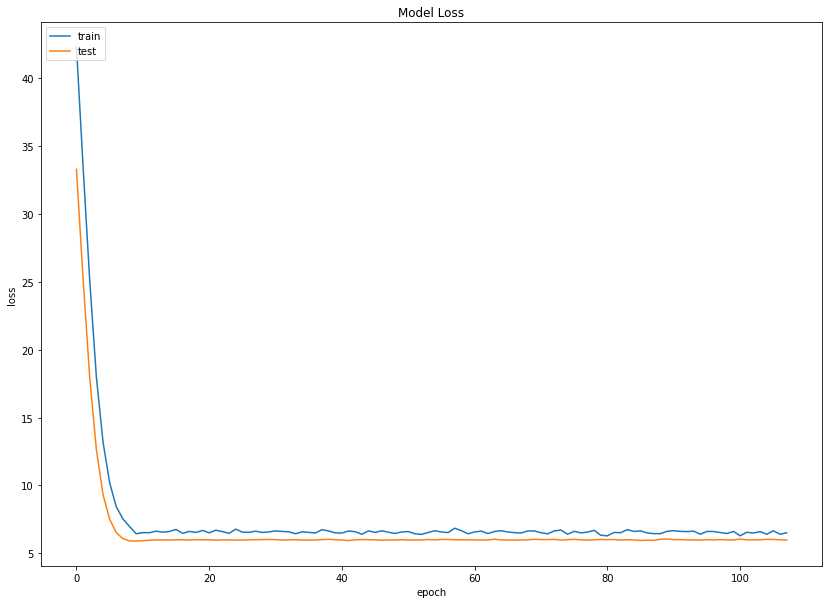

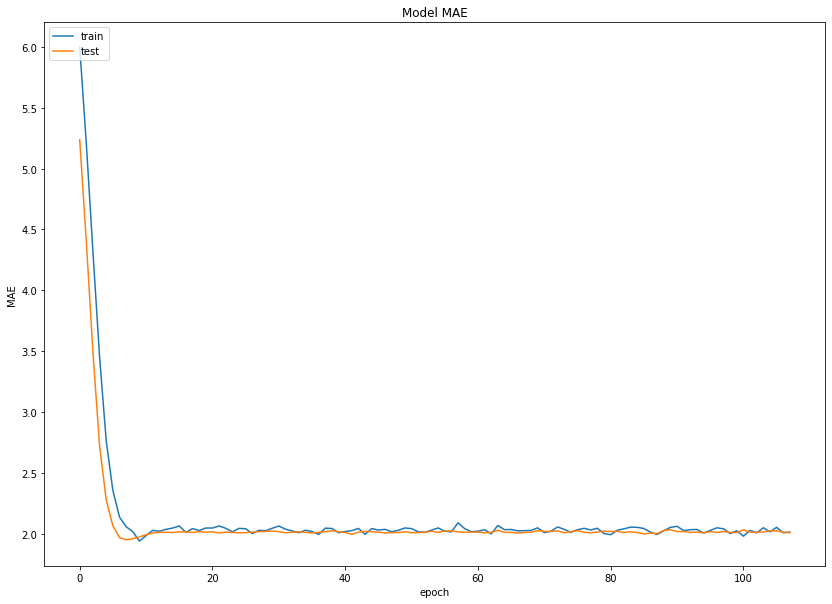

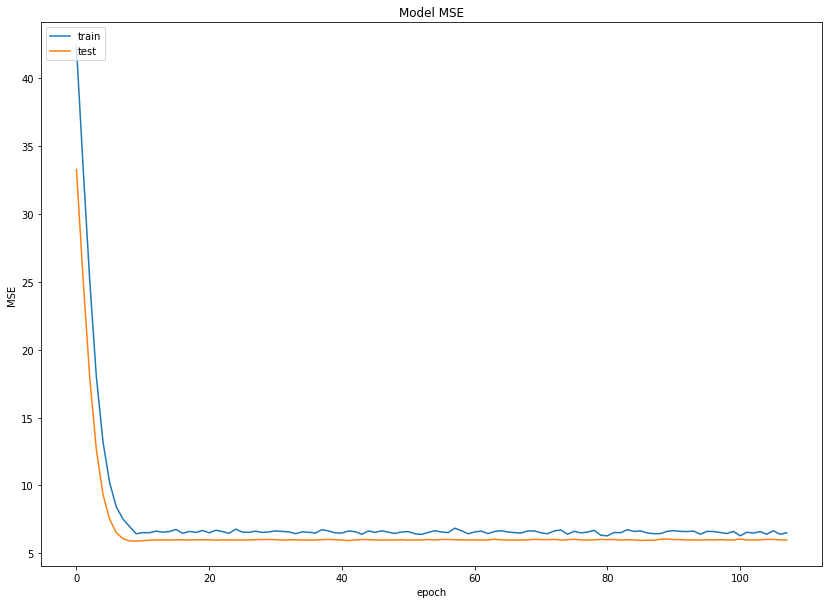



11/11 [==============================] - 0s 820us/step


In [10]:
show_info(model, x_test, y_test, log, weights='/home/m-marouni/Documents/CE-901/Heathrow/best_weights')